In [3]:
from google.colab import drive

drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the cleaned data
data = pd.read_csv('/content/gdrive/MyDrive/Masters Capstone Project/cleaned_data.csv')



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384222 entries, 0 to 384221
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     384222 non-null  object 
 1   StockCode     384222 non-null  object 
 2   Description   384222 non-null  object 
 3   Quantity      384222 non-null  int64  
 4   InvoiceDate   384222 non-null  object 
 5   UnitPrice     384222 non-null  float64
 6   CustomerID    384222 non-null  float64
 7   Country       384222 non-null  object 
 8   InvoiceMonth  384222 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 26.4+ MB


**Descriptive Analysis**



*   **Countries with most customers**



In [7]:
# Descriptive analytics on countries with most customers
top_countries = data['Country'].value_counts(normalize=True).head(10)
top_countries_percentage = (top_countries * 100).round(2).astype(str) + ' %'

In [8]:
print("Top 10 Countries by Percentage of Customers:")
print(top_countries_percentage)

Top 10 Countries by Percentage of Customers:
Country
United Kingdom    88.73 %
Germany            2.38 %
France             2.12 %
EIRE               1.86 %
Spain              0.64 %
Netherlands        0.59 %
Belgium            0.51 %
Switzerland        0.49 %
Portugal           0.36 %
Australia          0.33 %
Name: proportion, dtype: object


In [9]:
import plotly.express as px

top_countries_df = pd.DataFrame({'Country': top_countries.index, 'Percentage of Customers': top_countries_percentage})

# Plot the world map
fig = px.choropleth(top_countries_df,
                    locations='Country',
                    locationmode='country names',
                    color='Percentage of Customers',
                    color_continuous_scale='Viridis',
                    title='Top 10 Countries by Percentage of Customers')


fig.show()


Change datatype of InvoiceDate to plot the number of invoices per year

In [10]:
print(data['InvoiceDate'].dtype)


object


In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


* **Number of invoices per year**

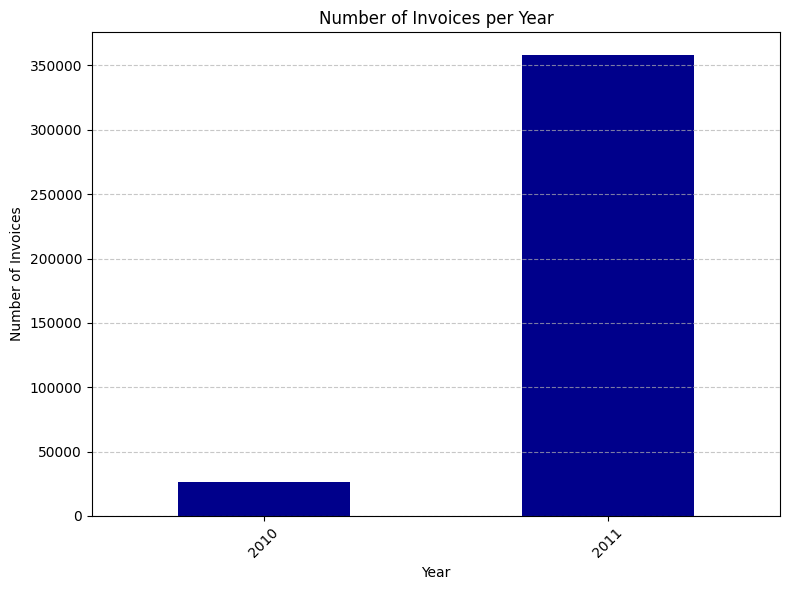

In [12]:
# Plotting the number of invoices per year
plt.figure(figsize=(8, 6))
invoices_per_year = data['InvoiceDate'].dt.year.value_counts().sort_index()
invoices_per_year.plot(kind='bar', color='darkblue', rot=45)
plt.title('Number of Invoices per Year')
plt.xlabel('Year')
plt.ylabel('Number of Invoices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Products contributing to maximum Price Value**

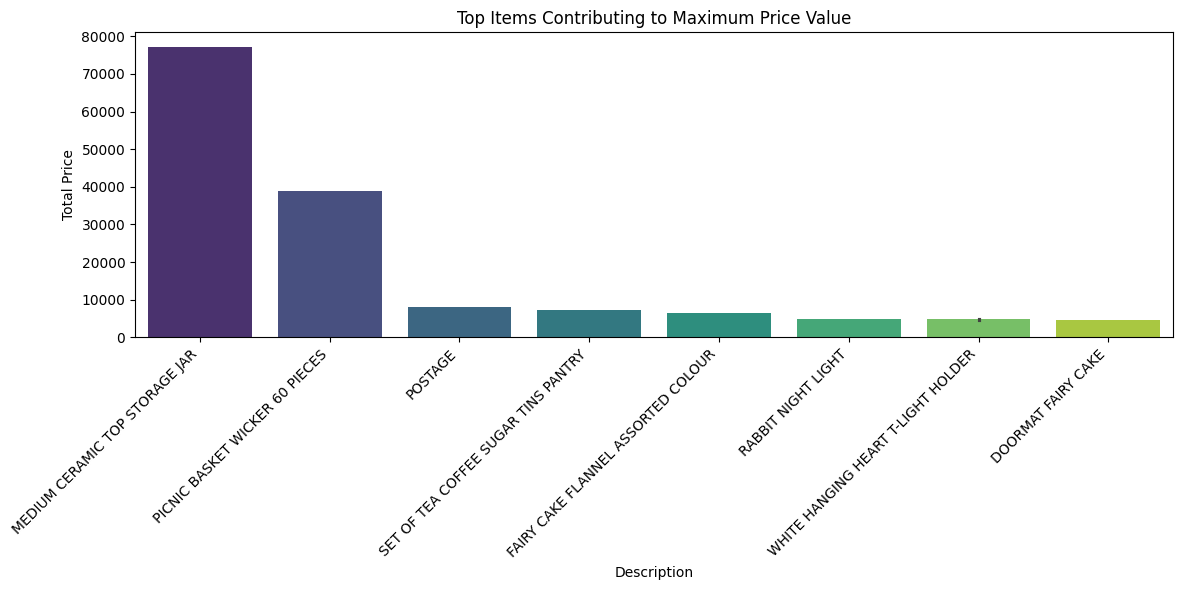

In [13]:
# Calculate TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

top_items = data.sort_values(by ='TotalPrice', ascending=False).head(10)

desc = top_items['Description']
price = top_items['TotalPrice']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=desc, y=price, hue=desc, palette='viridis', dodge=False, legend=False)
plt.title('Top Items Contributing to Maximum Price Value')
plt.xlabel('Description')
plt.ylabel('Total Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



* **Top Selling Products: Distribution of Sales for the Top 20 Products**

<ipython-input-14-4b3c079b8de3>:6: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.




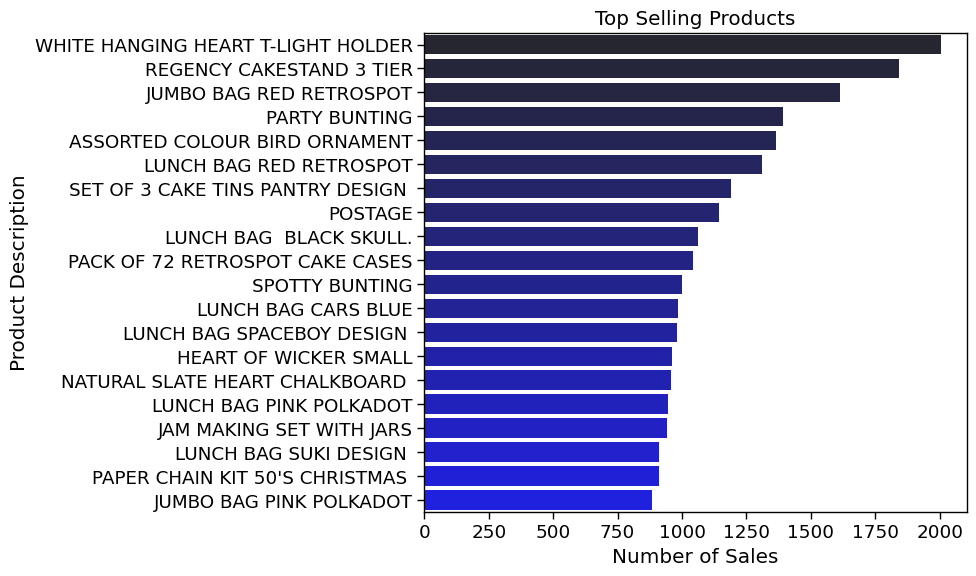

In [14]:
# Get the top 20 selling products
top_products = data['Description'].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, color ='blue', dodge=False, legend=False)
plt.title("Top Selling Products")
plt.xlabel("Number of Sales")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

**Cohort Analysis**

Cohort analysis involves grouping subjects with a shared characteristic and tracking their behavior over time. By comparing how different cohorts behave, we can uncover trends and patterns unique to each group.

For cohort analysis, we create labels such as:

- Invoice period: Represents the year and month of a single transaction.
- Cohort group: Represents the year and month of a customer's first purchase, which remains consistent across all subsequent purchases.
- Cohort period/Index: Represents the number of months since a customer's first purchase, indicating their stage in the customer lifecycle.


In [16]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95



* **Monthly Acquisition Cohorts**

In [17]:
import datetime

def extract_month(date):
    return datetime.datetime(date.year, date.month, 1)

# Convert 'InvoiceDate' column to datetime objects
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['InvoiceMonth'] = data['InvoiceDate'].apply(lambda x: extract_month(x))
grouping = data.groupby('CustomerID')['InvoiceMonth']
data['CohortMonth'] = grouping.transform('min')



In [18]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01


Calculate the time offset in months for each transaction. This offset represents the difference in months between the invoice date and the cohort date for each customer.

In [19]:
# extract year and month
def extract_year_month(column):
    return column.dt.year, column.dt.month

def display_unique_terms(years, months, label):
    unique_years = [year for year in years.unique()]
    unique_months = [month for month in months.unique()]
    print(f"Unique terms for {label} Year:", unique_years)
    print(f"Unique terms for {label} Month:", unique_months)

invoice_year, invoice_month = extract_year_month(data['InvoiceMonth'])
cohort_year, cohort_month = extract_year_month(data['CohortMonth'])

display_unique_terms(cohort_year, cohort_month, "Cohort")

display_unique_terms(invoice_year, invoice_month, "Invoice")

Unique terms for Cohort Year: [2010, 2011]
Unique terms for Cohort Month: [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Unique terms for Invoice Year: [2010, 2011]
Unique terms for Invoice Month: [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [20]:
def calculate_cohort_index(invoice_year, cohort_year, invoice_month, cohort_month):
    # difference in years between Invoice and Cohort Year
    year_diff = invoice_year - cohort_year

    # difference in months between Invoice and Cohort Month
    month_diff = invoice_month - cohort_month

    cohort_index = year_diff * 12 + month_diff + 1

    return cohort_index

# calculate cohort index
data['CohortIndex'] = calculate_cohort_index(invoice_year, cohort_year, invoice_month, cohort_month)

# display unique values of Cohort Index
unique_cohort_index = data['CohortIndex'].unique()
print("Unique values of Cohort Index:", unique_cohort_index)

print("Cohort DataFrame:")
display(data)


Unique values of Cohort Index: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Cohort DataFrame:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
384217,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01,9
384218,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01,9
384219,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01,12
384220,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01,12


* **Cohort Retention and Purchase behavior**

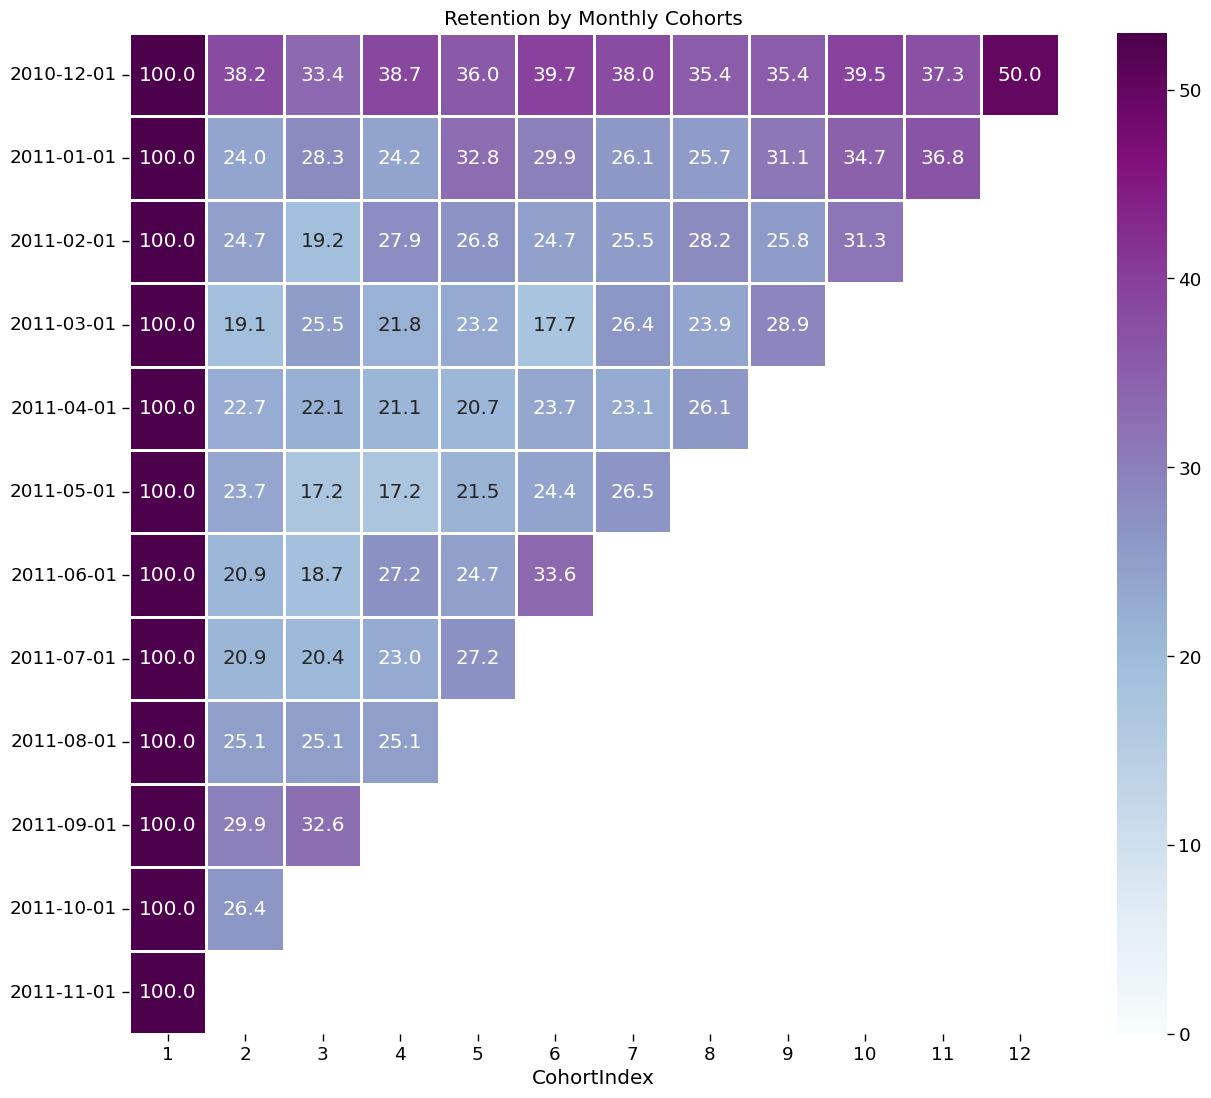

In [21]:
# Calculate retention rate
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0) * 100
retention.index = retention.index.date

# Plot retention rate
plt.figure(figsize=(15, 13))
plt.title('Retention by Monthly Cohorts')
ax = sns.heatmap(data=retention,
                 annot=True,
                 cmap="BuPu",
                 vmin=0.0,
                 vmax=list(retention.max().sort_values(ascending=False))[1]+3,
                 fmt='.1f',
                 linewidth=0.9)
plt.show()

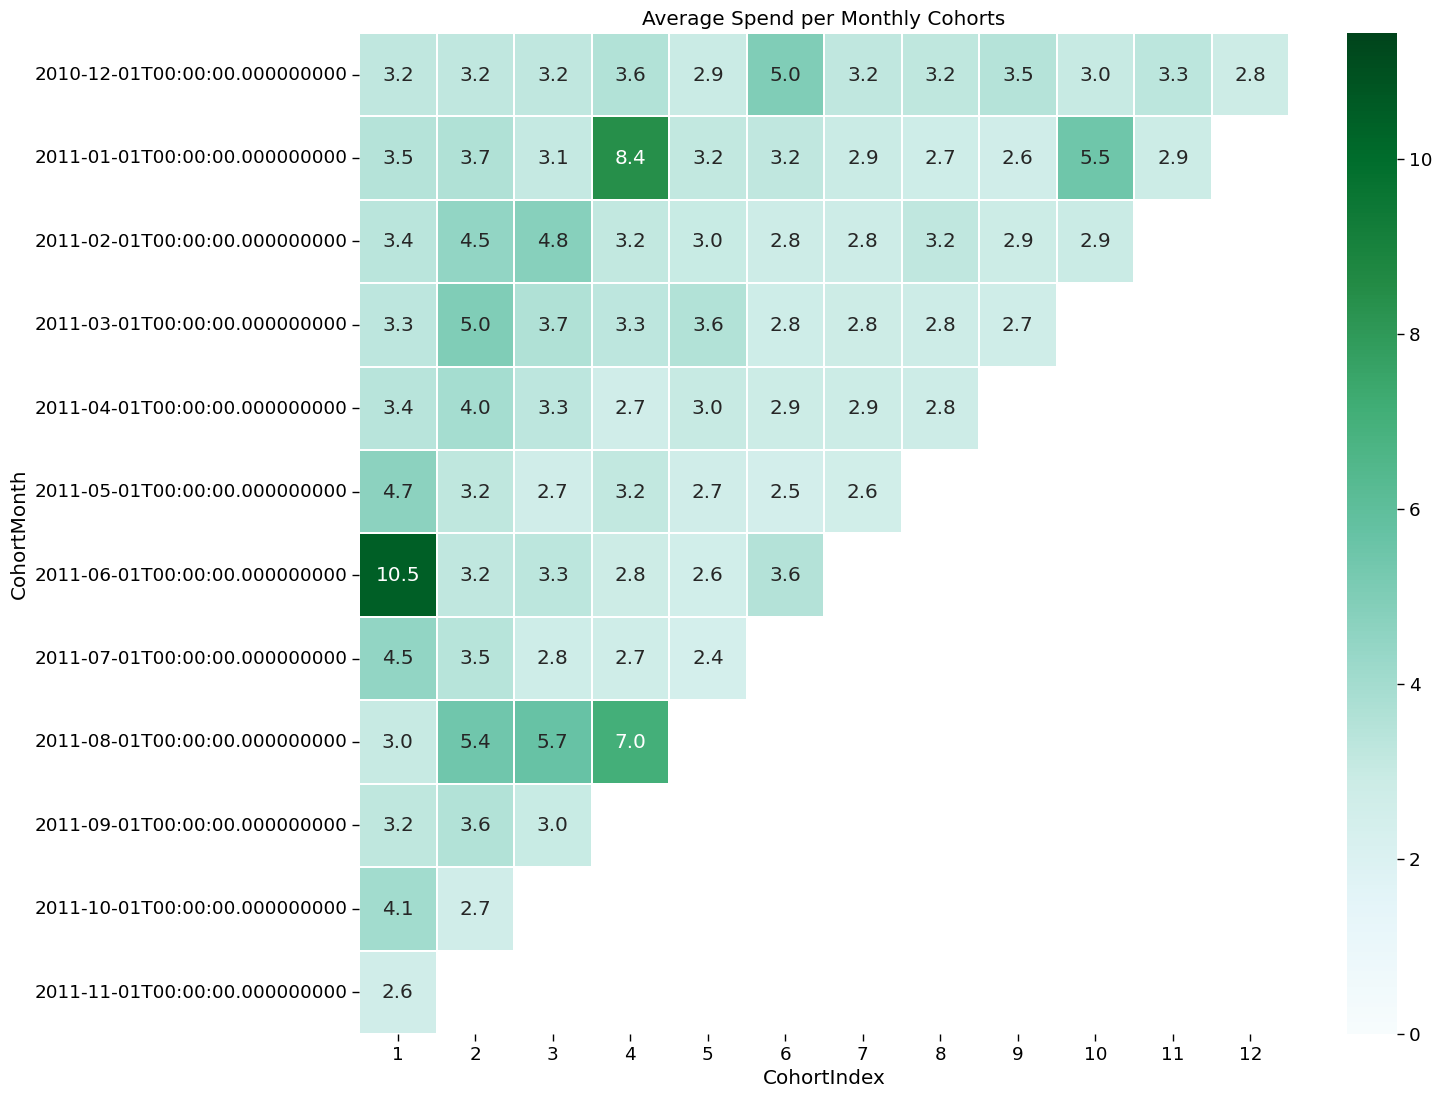

In [22]:
# Calculate average price per cohort
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['UnitPrice'].mean().reset_index()
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')

# Plot average price
plt.figure(figsize=(15, 13))
plt.title('Average Spend per Monthly Cohorts')
ax = sns.heatmap(data=average_price,
                 annot=True,
                 vmin=0.0,
                 cmap='BuGn',
                 vmax=list(average_price.max().sort_values(ascending=False))[1]+3,
                 fmt='.1f',
                 linewidth=0.3)
plt.show()

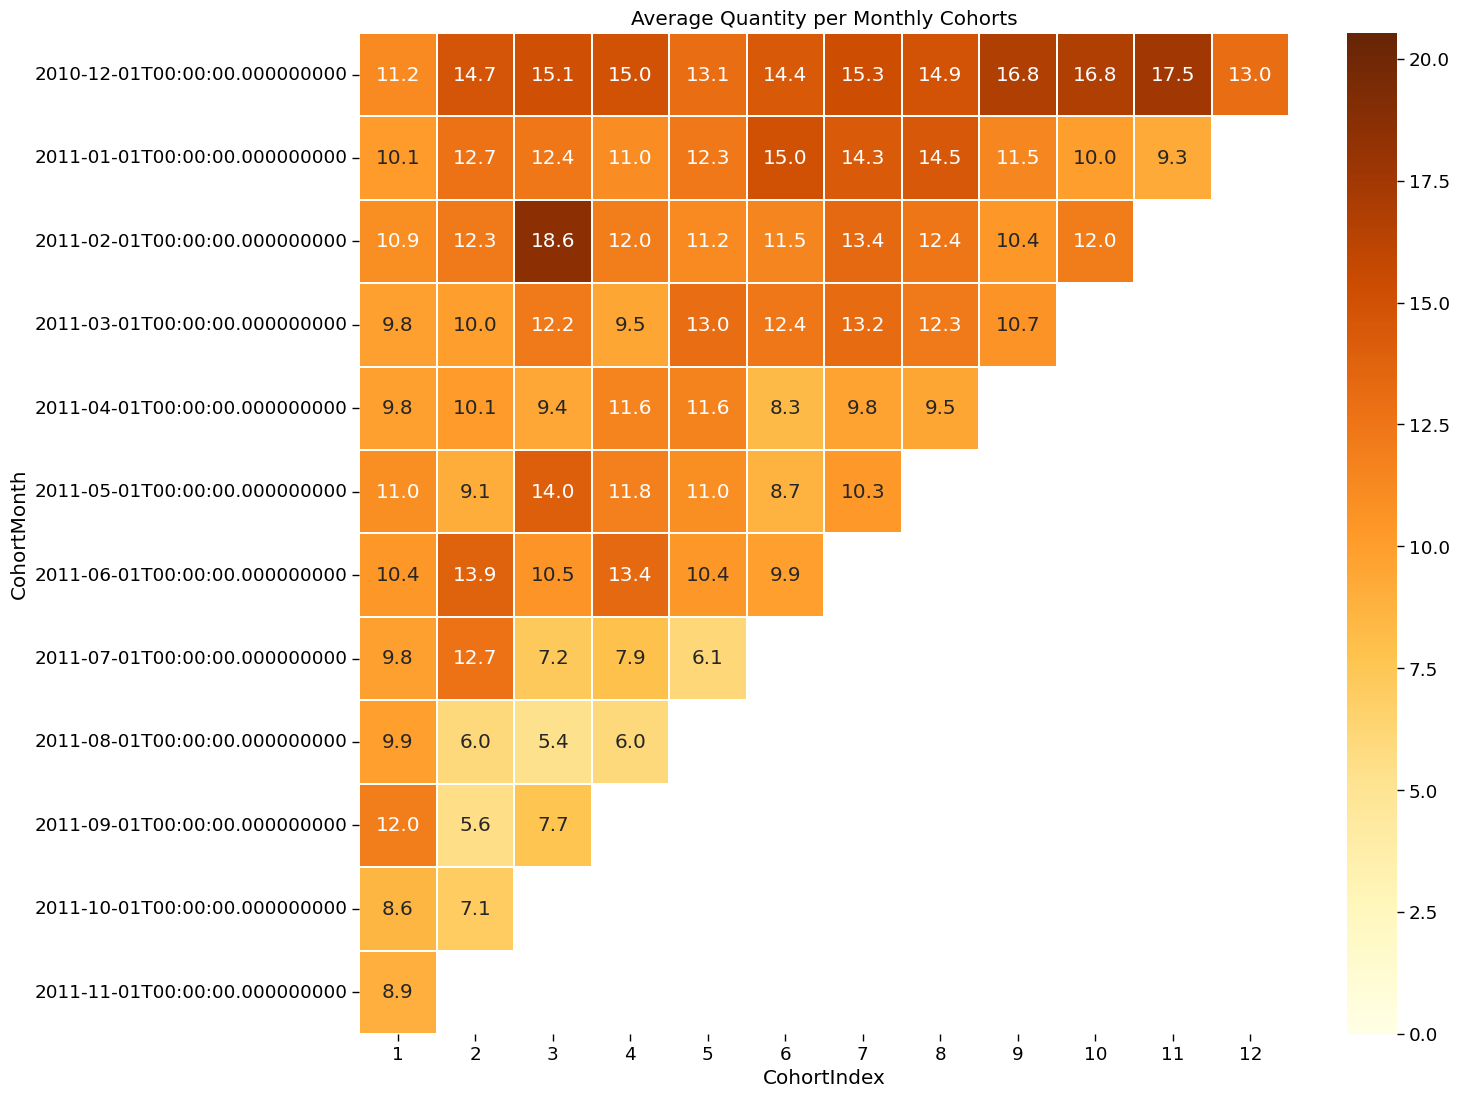

In [23]:
# Calculate average quantity per cohort
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean().reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')

# Plot average quantity
plt.figure(figsize=(15, 13))
plt.title('Average Quantity per Monthly Cohorts')
ax = sns.heatmap(data=average_quantity,
                 annot=True,
                 vmin=0.0,
                 cmap='YlOrBr',  # Changed color scheme
                 vmax=list(average_quantity.max().sort_values(ascending=False))[1]+3,
                 fmt='.1f',
                 linewidth=0.3)
plt.show()
